In [180]:
import pandas as pd 

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns # data visualization

import warnings
warnings.filterwarnings("ignore")

In [181]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [182]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/employee/train.csv
/kaggle/input/employee/test.csv


In [183]:
train_data = pd.read_csv('/kaggle/input/employee/train.csv')
test_data = pd.read_csv('/kaggle/input/employee/test.csv')

In [184]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [185]:
test_data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,34,Travel_Rarely,790,Sales,24,4,Medical,1,1489,1,...,3,80,0,16,2,4,15,9,10,10
1,35,Travel_Rarely,660,Sales,7,1,Life Sciences,1,1492,4,...,1,80,1,1,3,3,1,0,0,0
2,24,Travel_Frequently,381,Research & Development,9,3,Medical,1,1494,2,...,3,80,0,4,2,2,0,0,0,0
3,24,Non-Travel,830,Sales,13,2,Life Sciences,1,1495,4,...,3,80,1,1,2,3,1,0,0,0
4,44,Travel_Frequently,1193,Research & Development,2,1,Medical,1,1496,2,...,2,80,0,16,2,2,2,2,2,2


In [186]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [187]:
corel=train_data.corr()
corel

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.172067,0.010507,-0.022753,0.180723,NaN,0.013321,0.029247,0.005901,0.044010,...,0.052445,NaN,0.010683,0.690428,-0.004970,-0.026016,0.313454,0.210148,0.211967,0.194128
Attrition,-0.172067,1.000000,-0.051992,0.078074,-0.032631,NaN,0.033647,-0.132848,-0.017524,-0.150196,...,-0.053417,NaN,-0.164228,-0.177137,-0.047859,-0.059556,-0.135134,-0.158757,-0.031944,-0.155962
DailyRate,0.010507,-0.051992,1.000000,0.027120,-0.039805,NaN,-0.055462,0.023005,0.038572,0.058871,...,-0.013600,NaN,0.044321,0.024266,-0.000817,-0.057479,-0.047141,-0.001487,-0.047469,-0.038338
DistanceFromHome,-0.022753,0.078074,0.027120,1.000000,0.006185,NaN,0.000823,-0.020197,0.048494,0.051250,...,0.010755,NaN,0.048544,-0.025465,-0.005176,-0.051469,-0.028687,-0.005367,-0.009304,-0.005352
Education,0.180723,-0.032631,-0.039805,0.006185,1.000000,NaN,0.006851,-0.002332,0.026237,0.034317,...,0.008438,NaN,-0.005877,0.131213,-0.039092,0.010054,0.055830,0.070081,0.064578,0.080093
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,0.013321,0.033647,-0.055462,0.000823,0.006851,NaN,1.000000,0.016635,0.038996,0.010762,...,-0.096426,NaN,0.031391,0.021626,-0.007399,0.026469,0.001962,-0.000527,0.001439,-0.008854
EnvironmentSatisfaction,0.029247,-0.132848,0.023005,-0.020197,-0.002332,NaN,0.016635,1.000000,-0.064578,0.012431,...,-0.003999,NaN,0.021579,0.007392,-0.031968,0.017335,0.002463,0.027112,0.022197,0.002739
HourlyRate,0.005901,-0.017524,0.038572,0.048494,0.026237,NaN,0.038996,-0.064578,1.000000,0.047156,...,-0.012714,NaN,0.021539,-0.017238,-0.017006,-0.001058,-0.022893,-0.035471,-0.049503,-0.031806
JobInvolvement,0.044010,-0.150196,0.058871,0.051250,0.034317,NaN,0.010762,0.012431,0.047156,1.000000,...,0.049298,NaN,0.043353,-0.007514,-0.030002,-0.029776,-0.011757,0.009100,-0.017878,0.032704


[]

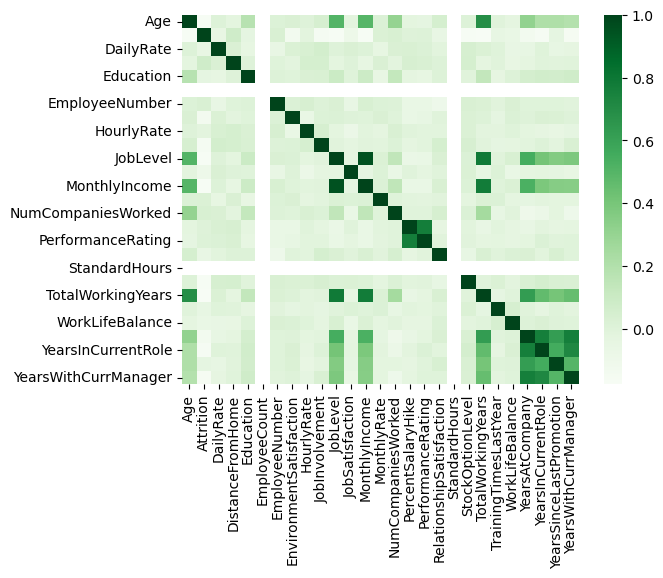

In [188]:
sns.heatmap(corel,cmap='Greens')
plt.plot()

# ****Exploratory Data Analysis

<Axes: >

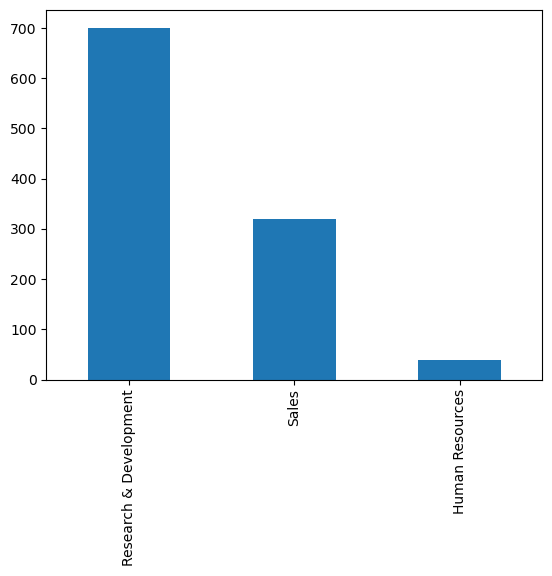

In [189]:
train_data['Department'].value_counts().plot.bar()

# Age

<Axes: ylabel='Frequency'>

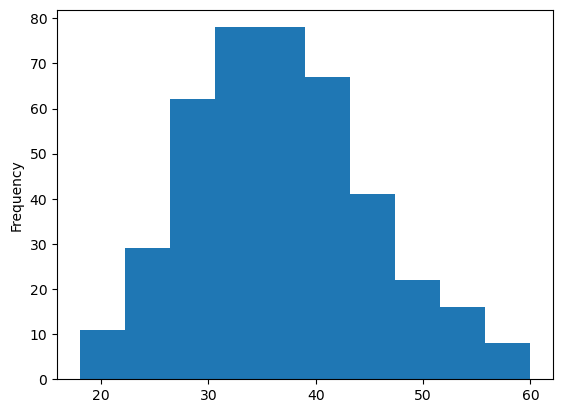

In [190]:
test_data['Age'].plot.hist()

# MonthlyIncome by Department

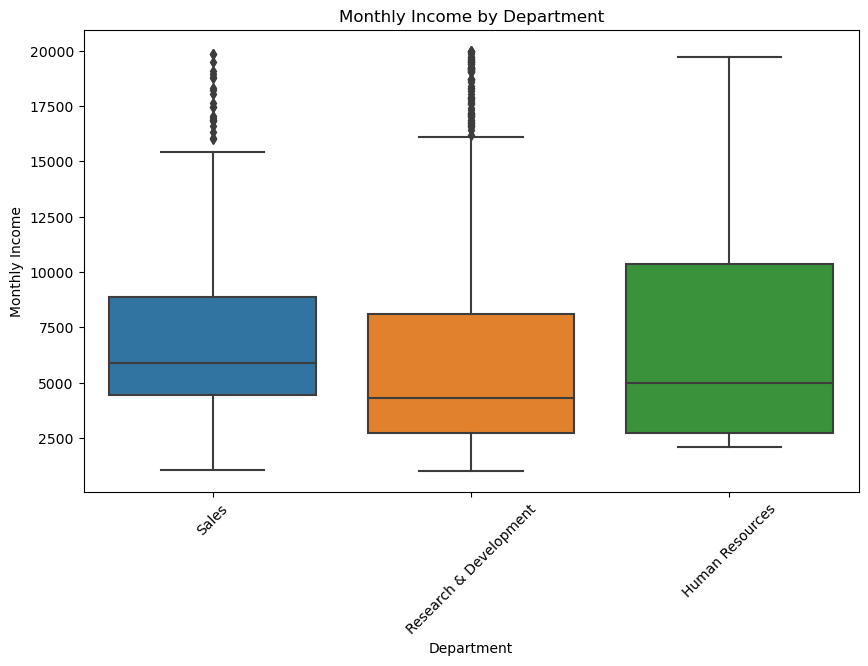

In [191]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Department', y='MonthlyIncome')
plt.title('Monthly Income by Department')
plt.xlabel('Department')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

#  Numerical features

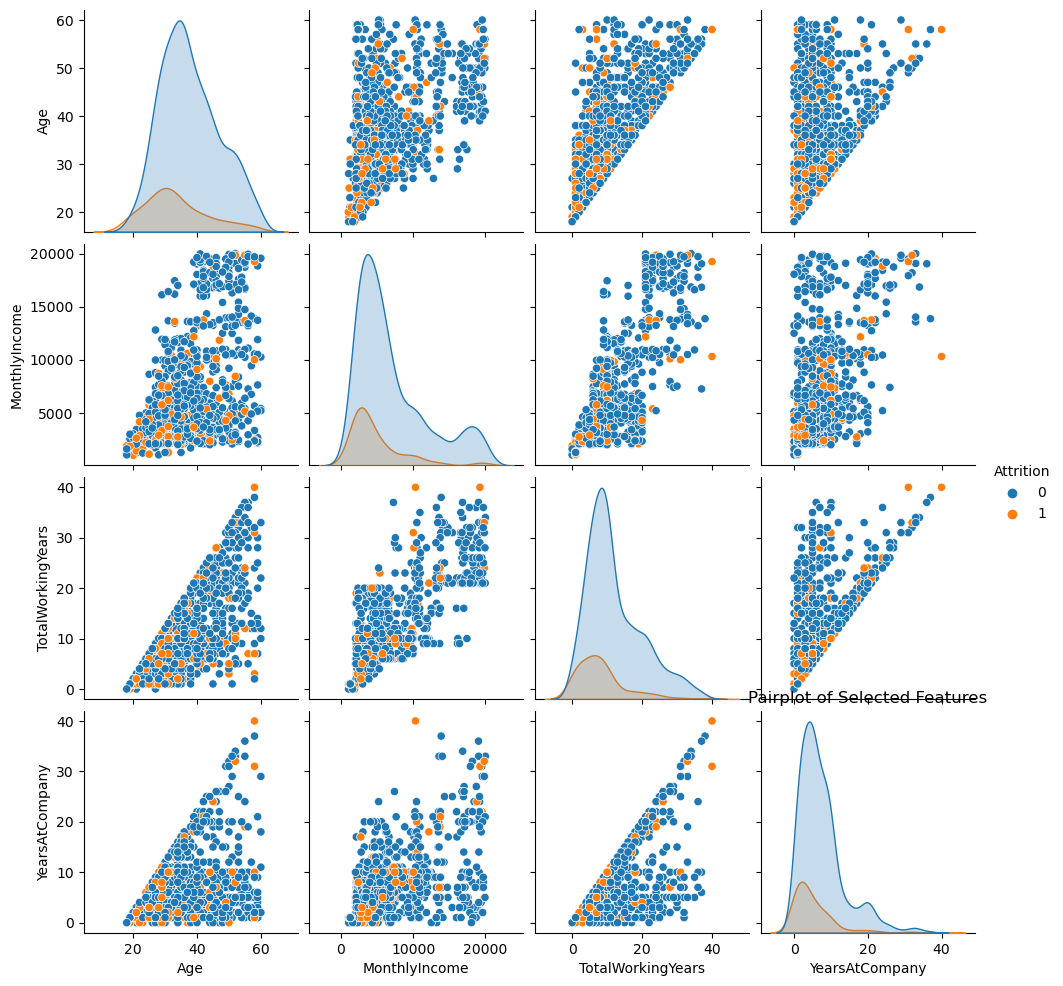

In [192]:
selected_features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'Attrition']
sns.pairplot(data=train_data[selected_features], hue='Attrition')
plt.title('Pairplot of Selected Features')
plt.show()

# Attrition by BusinessTravel

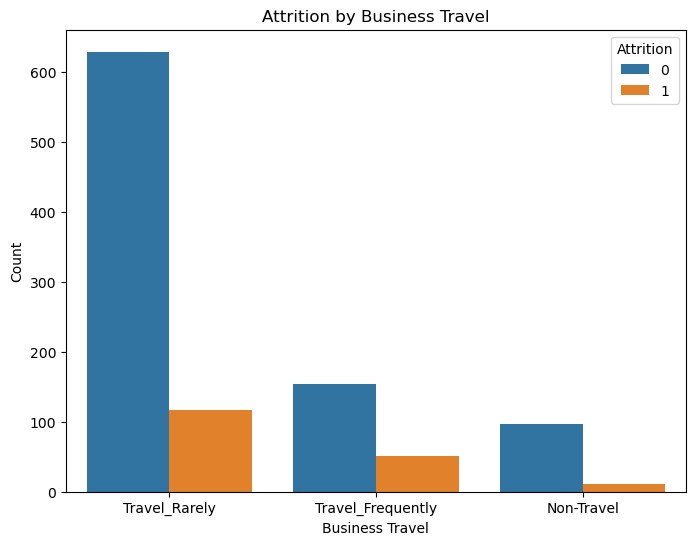

In [193]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='BusinessTravel', hue='Attrition')
plt.title('Attrition by Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()

#  Attrition by JobRole

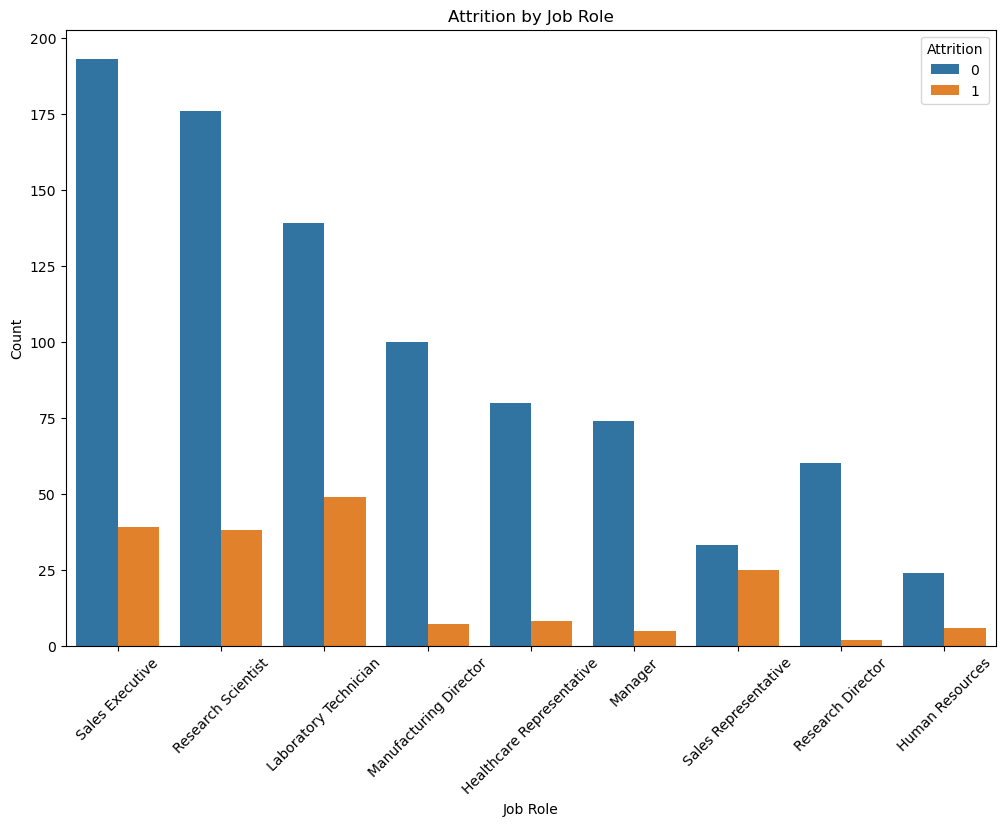

In [194]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train_data, x='JobRole', hue='Attrition')
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Attrition by MaritalStatus


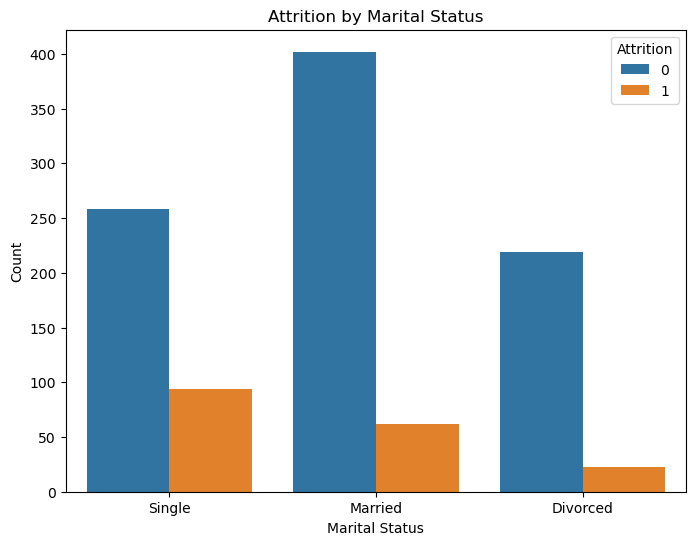

In [195]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='MaritalStatus', hue='Attrition')
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


#  MonthlyIncome by EducationField

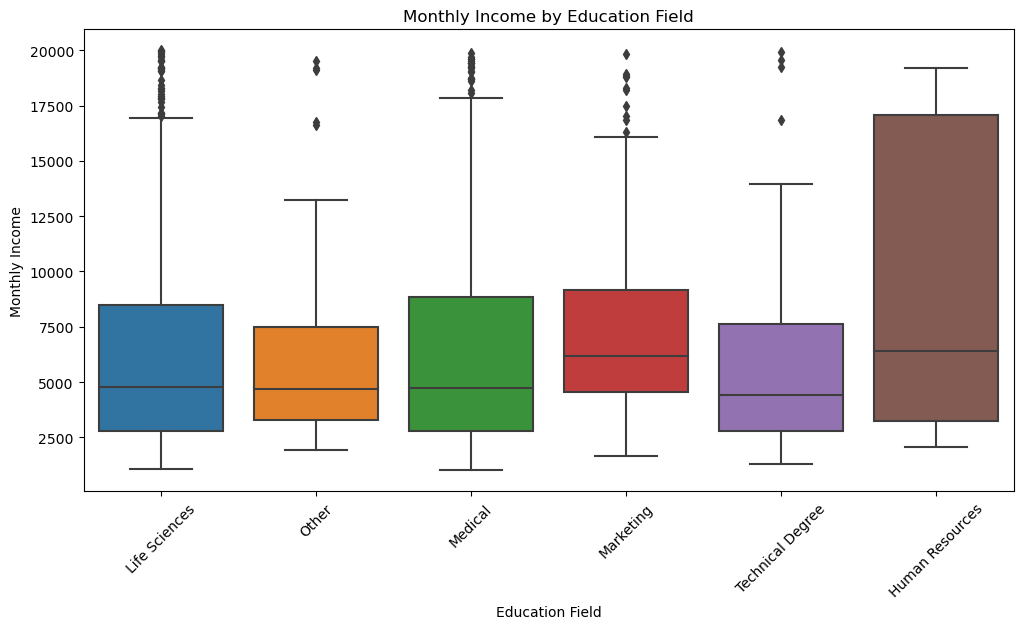

In [196]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='EducationField', y='MonthlyIncome')
plt.title('Monthly Income by Education Field')
plt.xlabel('Education Field')
plt.ylabel('Monthly Income')
plt.xticks(rotation=45)
plt.show()

# YearsAtCompany vs. Age colored by Attrition

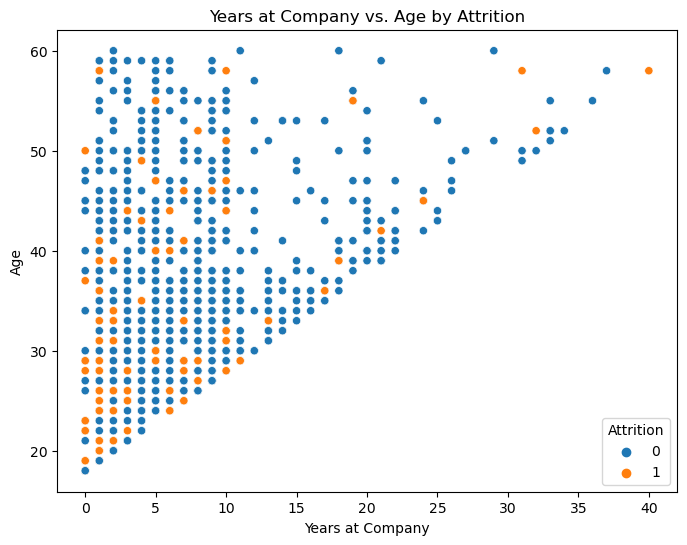

In [197]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train_data, x='YearsAtCompany', y='Age', hue='Attrition')
plt.title('Years at Company vs. Age by Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Age')
plt.show()


#  JobSatisfaction by Department

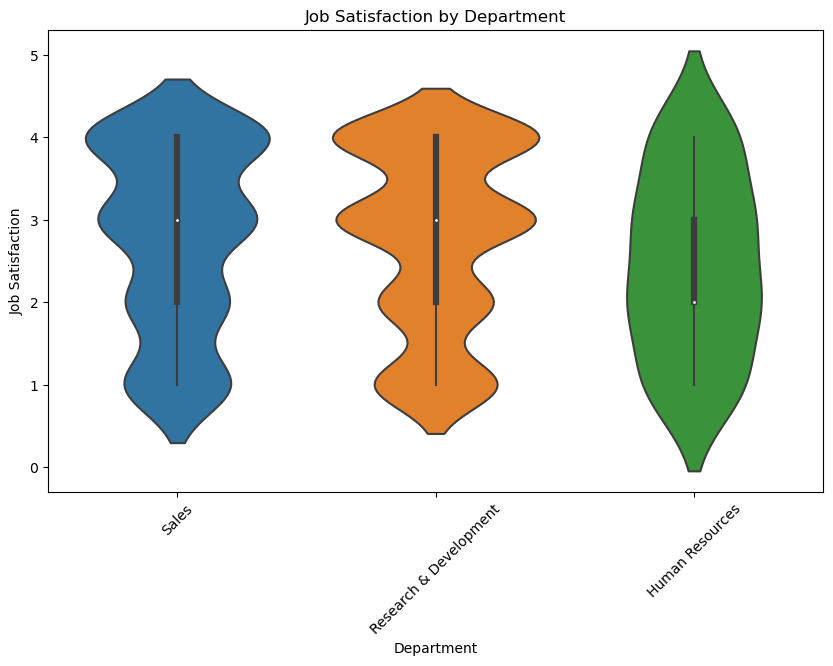

In [198]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, x='Department', y='JobSatisfaction')
plt.title('Job Satisfaction by Department')
plt.xlabel('Department')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=45)
plt.show()

#  Average MonthlyIncome by Education

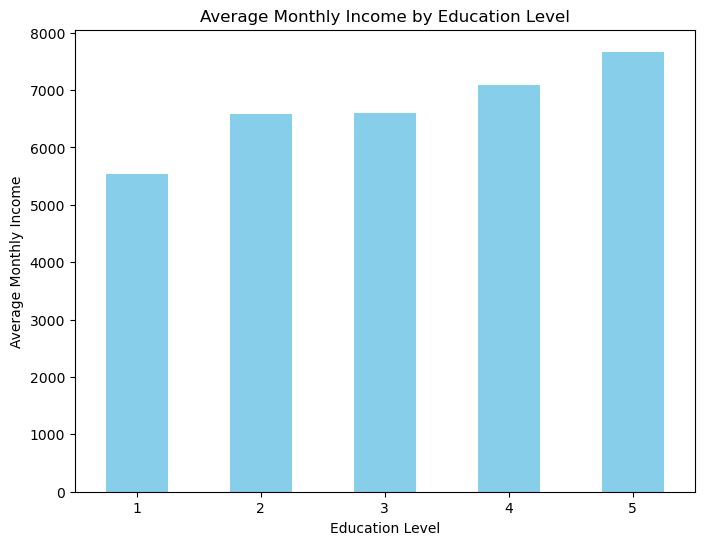

In [199]:
avg_monthly_income_by_education = train_data.groupby('Education')['MonthlyIncome'].mean()
plt.figure(figsize=(8, 6))
avg_monthly_income_by_education.plot(kind='bar', color='skyblue')
plt.title('Average Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.xticks(rotation=0)
plt.show()


# ****Modelling

# Split the dataset into training and testing sets

In [200]:
X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]
X_test = test_data.iloc[:, :-1]
y_test = test_data.iloc[:, -1]


In [201]:
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target (y)
X = train_data.drop(columns=['Attrition'])
y = train_data['Attrition']

# Perform one-hot encoding on categorical features
X_encoded = pd.get_dummies(X, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime'])


# Check unique values in the 'Over18' column
unique_values = X_encoded['Over18'].unique()
print(unique_values)

# If the 'Over18' column contains only 'Y', consider removing it
X_encoded = X_encoded.drop(columns=['Over18'])

# Proceed with your data preprocessing and model fitting

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Print columns and data types of X_train for debugging
print(X_train.columns)
print(X_train.dtypes)

# Initialize and train the logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict using the trained model
y_pred_lr = lr.predict(X_test)


['Y']
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male',

In [202]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [203]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [204]:
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Decision Tree Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.8349056603773585
Decision Tree Accuracy: 0.7641509433962265
Random Forest Accuracy: 0.8537735849056604
